In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use("ggplot")

# Creating sample data

In [2]:
df = pd.DataFrame({
    "age": [25, 28, 31, 49, 25, 51, 58, 71, 25, 21],
    "height": [168, 173, 199, 183, 151, 165, 188, 189, 190, 165],
    "result": [0, 1, 1, 0, 0, 1, 0, 0, 1, 1]
})

df.head(2)

,age,height,result
0,25,168,0
1,28,173,1


# Creating some generic helper functions

In [8]:
def prepare(*args):
    x = df[[a for a in args]].copy()
        
    return np.array(x).reshape(-1, len(args))

def prediction(lower_bound, upper_bound):
    y = [num for num in range(lower_bound, upper_bound+1)]
    
    return np.array(y).reshape(-1, 1)

# Logistic Regression

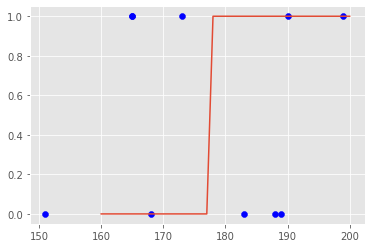

In [10]:
from sklearn.linear_model import LogisticRegression

# Preparing Data
x = prepare("height")
y = prepare("result")

predict = prediction(160, 200)

# Creating model
lr = LogisticRegression()
lr.fit(x, y)

# PLotting the Model
plt.scatter(x, y, color = "blue")
plt.plot(predict, lr.predict(predict));

# Decision Tree Classification

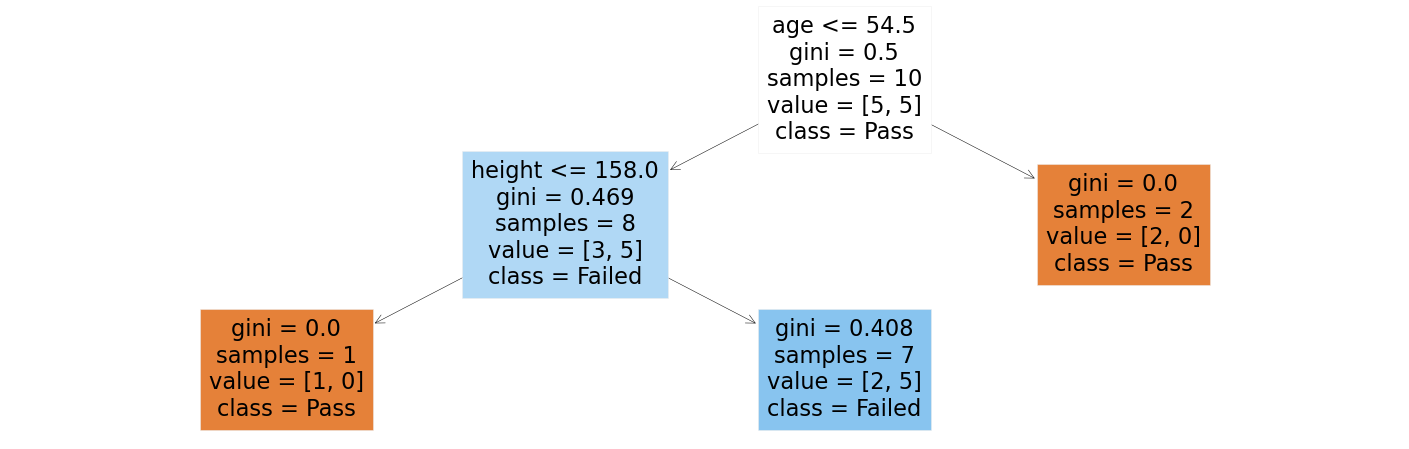

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Preparing Data
x = prepare("height", "age")
y = prepare("result")

# Creating Model
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(x, y)

# Plotting Trees
fig, ax = plt.subplots(figsize=(25, 8))
plot_tree(clf, ax = ax, feature_names = ["height", "age"], class_names = ["Pass", "Failed"], filled = True);
plt.show()

# Support Vector Machines

Since using Support Vector Machine Algorithm is kinda overfitted for using it on one parameter, we add another parameter with the age of the persons. The SVM-Algorithm tries to create boundaries on which the desired output-value changes. This can be achieved with multiple kernels (see: [User Guide](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html))

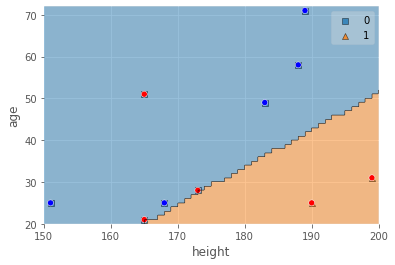

In [30]:
from sklearn import svm
from mlxtend.plotting import plot_decision_regions

# Preparing Data
x = prepare("height", "age")
y = prepare("result")

# Creating Model
clf = svm.SVC(kernel = "linear")
clf.fit(x, y)


# Plotting with mlxtend
# we need to add seaborn scatteprlot to get the real results instead of the predicted results as markers, we get the backgroundcolor as prediction zones
plot_decision_regions(x, clf.predict(x), clf=clf, legend = 1)
sns.scatterplot(df["height"], df["age"], hue = df["result"], legend = False, palette=["blue", "red"]);